# TD2 part 1
Dans ce TD, nous allons construire un RNN from scratch avec Pytorch, en suivant les étapes suivantes:

- Sur un problème non-linéaire, nous allons construire un multi-layers perceptron
- Sur un problème de texte, nous utiliserons pytorch pour optimiser un RNN


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Problème simple

## Données exemples
Nous allons construire des données $y = \beta^* X + b$


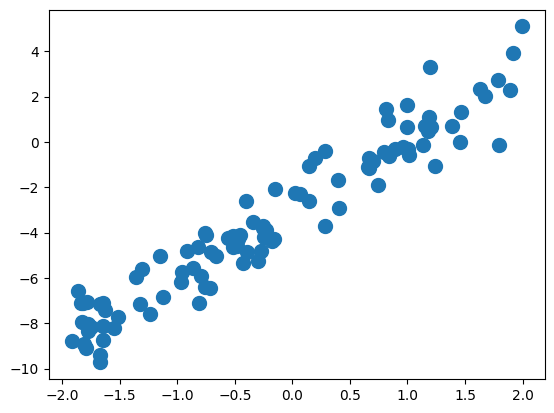

In [10]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * x + b_star + noise

x = torch.tensor(x, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

### Constuire l'optimizer

- Avec torch.nn.Parameter(), créer le paramètre beta qui sera optimisé. Les predictions du modèle sont égales à $\beta \times X$ 
- Avec torch.nn.MSELoss, déclarer la loss entre les prédictions et le résultat réel. loss.backward() pour mettre à jour les gradients
- Avec torch.optim.Adam, déclarer un optimizer
- Construisez la boucle qui, pour n_epochs, va reset les gradients, calculer la loss, mettre à jour les gradients et faire un pas pour optimiser beta

In [11]:
xvec = torch.tensor(xvec, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

beta = torch.nn.Parameter(torch.tensor(a_star * xvec, dtype=torch.float32))

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam([beta], lr=0.01)
epochs = 10000

for epoch in range(epochs):
    optimizer.zero_grad()
    y_hat = beta * xvec
    loss_val = loss_fn(y_hat, y)
    loss_val.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss {loss_val.item()}')

/var/folders/3h/mtzh29f56s5d6tym3k89pnfw0000gn/T/ipykernel_31137/795866806.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xvec = torch.tensor(xvec, dtype=torch.float32)
/var/folders/3h/mtzh29f56s5d6tym3k89pnfw0000gn/T/ipykernel_31137/795866806.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.nn.Parameter(torch.tensor(a_star * xvec, dtype=torch.float32))


Epoch 0, loss 84.81423950195312
Epoch 100, loss 67.13574981689453
Epoch 200, loss 52.7981071472168
Epoch 300, loss 41.24266052246094
Epoch 400, loss 31.959060668945312
Epoch 500, loss 24.524980545043945
Epoch 600, loss 18.6041316986084
Epoch 700, loss 13.929616928100586
Epoch 800, loss 10.283515930175781
Epoch 900, loss 7.481524467468262
Epoch 1000, loss 5.364340782165527
Epoch 1100, loss 3.7937164306640625
Epoch 1200, loss 2.6508374214172363
Epoch 1300, loss 1.835436224937439
Epoch 1400, loss 1.264879584312439
Epoch 1500, loss 0.8728893399238586
Epoch 1600, loss 0.6078549027442932
Epoch 1700, loss 0.4308185577392578
Epoch 1800, loss 0.3133045434951782
Epoch 1900, loss 0.23516486585140228
Epoch 2000, loss 0.18259815871715546
Epoch 2100, loss 0.14644022285938263
Epoch 2200, loss 0.12077972292900085
Epoch 2300, loss 0.10189563035964966
Epoch 2400, loss 0.08748701214790344
Epoch 2500, loss 0.07614058256149292
Epoch 2600, loss 0.0669812262058258
Epoch 2700, loss 0.05945286899805069
Epoch 2

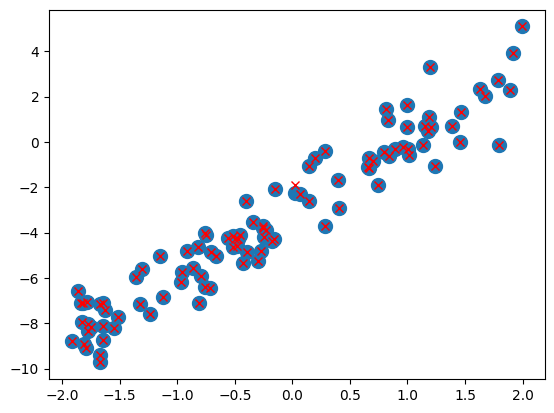

In [12]:
# Plot des predictions
plt.plot(x.numpy(), y.numpy(), 'o', markersize=10)
plt.plot(x.numpy(), beta.detach().numpy() * x.numpy(), 'rx')
plt.show()

# Multi-layers perceptron

## Données exemples

Ici, on a un modèle $y = ax² + b$

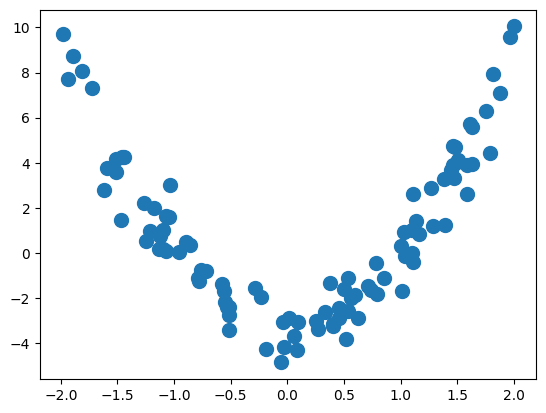

In [25]:
n = 100

a_star = 3.
b_star = -3.
noise_std = 1

x = (np.random.rand(n, 1) - 0.5) * 4
noise = np.random.normal(0, noise_std, (n, 1))
y = a_star * (x ** 2) + b_star + noise

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

xvec = x
plt.plot(x, y, 'o', markersize=10)

Nous allons construire un Pytorch modèle. Dans ce framework, on définit la fonction "forward" qui prend en argument les inputs et retourne les prédictions.

A l'aide de torch.nn.Module et de différentes layers (torch.nn.Linear, torch.nn.ReLU), terminez la classe ci-dessous pour créer un multi-layers perceptron 

In [26]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, layer_2_size, layer_3_size, layer_4_size, output_size=1):
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size, layer_2_size)
        self.layer2 = torch.nn.Linear(layer_2_size, layer_3_size)
        self.layer3 = torch.nn.Linear(layer_3_size, layer_4_size)
        self.layer4 = torch.nn.Linear(layer_4_size, output_size)

    def forward(self, X):
        X = torch.nn.functional.relu(self.layer1(X))
        X = torch.nn.functional.relu(self.layer2(X))
        X = torch.nn.functional.relu(self.layer3(X))
        X = self.layer4(X)
        return X

En utilisant le travail précédent, faite une cellule utilisant un torch optimizer pour optimiser le MLP 

In [27]:
# generate optimizer for MLP class
input_size = 1
layer_1_size = 50
layer_2_size = 30
layer_3_size = 20
output_size = 1

model = MLP(input_size, layer_1_size, layer_2_size, layer_3_size, output_size)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 50000

for epoch in range(epochs):
    optimizer.zero_grad()
    y_hat = model(xvec)
    loss_val = loss_fn(y_hat, y)
    loss_val.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss {loss_val.item()}')

Epoch 0, loss 13.554448127746582
Epoch 100, loss 0.8025062680244446
Epoch 200, loss 0.7761123180389404
Epoch 300, loss 0.758251428604126
Epoch 400, loss 0.753990650177002
Epoch 500, loss 0.7366431951522827
Epoch 600, loss 0.7472877502441406
Epoch 700, loss 0.7347300052642822
Epoch 800, loss 0.7243423461914062
Epoch 900, loss 0.7013922929763794
Epoch 1000, loss 0.6946966648101807
Epoch 1100, loss 0.6946998834609985
Epoch 1200, loss 0.6663575172424316
Epoch 1300, loss 0.6684390902519226
Epoch 1400, loss 0.6501368880271912
Epoch 1500, loss 0.6399701833724976
Epoch 1600, loss 0.632134199142456
Epoch 1700, loss 0.6297332644462585
Epoch 1800, loss 0.6366703510284424
Epoch 1900, loss 0.6262567639350891
Epoch 2000, loss 0.6210359334945679
Epoch 2100, loss 0.6195657849311829
Epoch 2200, loss 0.6134454607963562
Epoch 2300, loss 0.6095935106277466
Epoch 2400, loss 0.622286319732666
Epoch 2500, loss 0.6068930625915527
Epoch 2600, loss 0.611061155796051
Epoch 2700, loss 0.6796501278877258
Epoch 280

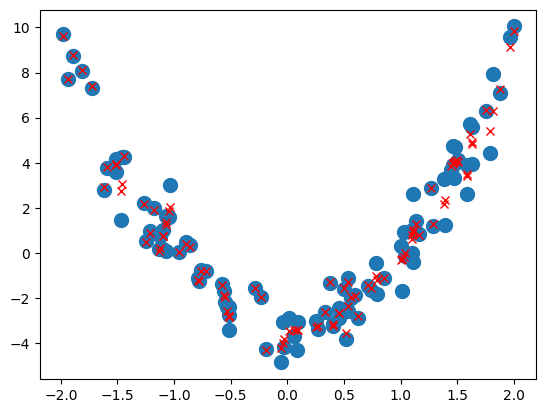

In [28]:
# Plot des predictions
plt.plot(x.numpy(), y.numpy(), 'o', markersize=10)
plt.plot(x.numpy(), model(xvec).detach().numpy(), 'rx')
plt.show()

# Problème de texte

On a des données prénom -> pays d'origine.
On veut utiliser un réseau de neurones qui, pour un nom, va prédire le pays d'origine en utilisant la suite de caractères.

## Extraction des données

Vous trouverez [ici](https://download.pytorch.org/tutorial/data.zip) un zip avec des fichiers \[nationalité\].txt contenant des prénoms pour chaque nationalité. <br/>
Nous allons avoir un jeu de données pays -> prénoms.

In [29]:
# Code pour générer le jeu de données
# En admettant que les fichiers ont été extraits dans data/raw/names/

import math
import numpy as np
from pathlib import Path
import random
import string
import time
import unicodedata

path = Path("../data/raw/names/")

In [30]:
def read_names(path):
    country_to_names = {}
    for file in path.iterdir():
        if not file.name.endswith(".txt"):
            continue

        with open(file) as f:
            names = [unicodeToAscii(line.strip()) for line in f]

        country = file.stem
        country_to_names[country] = names

    return country_to_names

# Handling ASCII stuff
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [31]:
country_to_names = read_names(path)

# Afficher un exemple de données extraites
for country, names in country_to_names.items():
    print(f"{country}: {names[:5]}")
    break

Czech: ['Abl', 'Adsit', 'Ajdrna', 'Alt', 'Antonowitsch']


## Transformation des prénoms en features

On va one-hot encode les lettres des prénoms. <br/>
Si on utilisait "a" ayant comme indice 0, "b" indice 1, ... "z" indice 25, <br/>
le prénom "abby" aurait les index suivants [0, 1, 1, 24], <br/>
ou la matrice: <br/>
[ <br/>
    \[1, 0, ..., 0, 0\] <br/>
    \[0, 1, ..., 0, 0\] <br/>
    \[0, 1, ..., 0, 0\] <br/>
    \[0, 0, ..., 1, 0\] <br/>
] <br/>

Dans les prénoms, nous avons des caractères spéciaux (comme "ö", "é", etc), donc nous utiliserons la table ASCII pour traduire les lettres en indice

In [63]:
ascii_size = 128

def get_normalized_ascii_indices(name):
    ascii_indices = [ord(char) for char in name]
    return ascii_indices

def one_hot_encode_name(name):
    return get_normalized_ascii_indices(name)

In [64]:
# Test de la fonction
name = "abby"

encoded_name = one_hot_encode_name(name)
print(encoded_name)

[97, 98, 98, 121]


In [65]:
def random_training_example():
    country = random.choice(list(country_to_names.keys()))
    name = random.choice(country_to_names[country])
    return country, name

def country_to_tensor(country):
    return torch.tensor([list(country_to_names.keys()).index(country)], dtype=torch.long)

def name_to_tensor(name):
    name_indices = one_hot_encode_name(name)
    return torch.tensor(name_indices, dtype=torch.long)

In [66]:
country, name = random_training_example()
country_tensor = country_to_tensor(country)
name_tensor = name_to_tensor(name)

print(f"Country: {country}, tensor: {country_tensor}")
print(f"Name: {name}, tensor: {name_tensor}")


Country: English, tensor: tensor([9])
Name: Newington, tensor: tensor([ 78, 101, 119, 105, 110, 103, 116, 111, 110])


## Jouons un peu avec les RNN

Le RNN (Recurrent neural network) est prévu pour prendre une série d'inputs et prédire un output.

In [53]:
# La table ascii a 128 caractères, une lettre one-hot encodée est donc un vecteur de taille 128
# Les inputs seront de tailles 128
model = torch.nn.RNN(input_size=128, hidden_size=1)
# Hidden_size est la dimension de l'output

In [54]:
# La lettre "a" est l'indice 97 dans la table ascii
letter_a = torch.zeros((1, 128))
letter_a[0][97] = 1

output, hidden = model(letter_a)
output

tensor([[-0.8689]], grad_fn=<SqueezeBackward1>)

In [56]:
# Le prénom "Abby" est une suite de 4 lettres# La lettre "a" est l'indice 97 dans la table ascii
name_abby = torch.zeros((1, 4, 128))
name_abby[0][0][97] = 1
name_abby[0][1][98] = 1
name_abby[0][2][98] = 1
name_abby[0][2][121] = 1

output, hidden = model(name_abby)
# On a un output pour chaque lettre. On considère que l'output de la dernière lettre est la nationalité à trouver
output

tensor([[[-0.8689],
         [-0.7164],
         [-0.9224],
         [-0.3485]]], grad_fn=<StackBackward0>)

## Un RNN et une loss pour notre dataset
Nous avons un problème de classification, nous allons utiliser la cross-entropy loss.

Dans notre problème, nous avons 18 classes différentes (18 nationalités).
Pour un prénom, notre réseau de neurones devra sortir la probabilité que le nom appartienne à chaque pays (un vecteur de taille 18, dont la somme fait 1).

Notre réseau aura donc un output de taille 18, et nous appliquerons la fonction softmax pour en faire des probabilités (la somme des 18 outputs fera 1). <br/>
Fonction softmax:

$ \sigma(x)_i = \frac{e^{x_i}}{\sum_{j=0}^{K} e^{x_j}} $

In [57]:
model = torch.nn.RNN(input_size=128, hidden_size=18)
loss = torch.nn.CrossEntropyLoss()

In [58]:
output, hidden = model(name_abby)

output.shape

torch.Size([1, 4, 18])

In [59]:
# Shape est 1 (un prénom), 4 (4 lettres), 18 (une valeur pour chacune des nationalités)

# On utilise l'output de la dernière lettre
output = output[:, -1, :]

proba = torch.nn.functional.softmax(output)
proba

/var/folders/3h/mtzh29f56s5d6tym3k89pnfw0000gn/T/ipykernel_31137/4147069149.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  proba = torch.nn.functional.softmax(output)


tensor([[0.0365, 0.0394, 0.0488, 0.0584, 0.0640, 0.0608, 0.0531, 0.0643, 0.0549,
         0.0667, 0.0482, 0.0414, 0.0703, 0.0483, 0.0483, 0.0621, 0.0642, 0.0702]],
       grad_fn=<SoftmaxBackward0>)

In [60]:
# Pour différents label (nationalité du prénom "Abby"), on a différentes cross-entropy loss
y = torch.zeros((1))
y = y.type(torch.LongTensor)
y[0] = 1

loss(proba, y)

tensor(2.9066, grad_fn=<NllLossBackward0>)

In [61]:
y[0] = 13

loss(proba, y)


tensor(2.8977, grad_fn=<NllLossBackward0>)

# Votre tour

Maintenant que nous avons des données, un modèle et une loss:
- Séparez vos données en train & test
- Faites une loop tirant au hasard des noms avec leur nationalité, calculez la sortie du réseau de neurones, sa loss, le gradient, et faites un step pour l'optimiser
- Une fois que vous avez un modèle qui marche, testez d'autres architectures de réseaux de neurones pour avoir le meilleur résultat.

### Split du dataset

In [119]:
# Check names repartition before splitting dataset
country_counts = {country: len(names) for country, names in country_to_names.items()}
print(country_counts)

{'Czech': 519, 'German': 724, 'Arabic': 2000, 'Japanese': 991, 'Chinese': 268, 'Vietnamese': 73, 'Russian': 9408, 'French': 277, 'Irish': 232, 'English': 3668, 'Spanish': 298, 'Greek': 203, 'Italian': 709, 'Portuguese': 74, 'Scottish': 100, 'Dutch': 297, 'Korean': 94, 'Polish': 139}


In [120]:
def split_dataset(split_ratio):
    data = []
    for country, names in country_to_names.items():
        for name in names:
            data.append((country, name))

    random.shuffle(data)
    split_index = math.floor(len(data) * split_ratio)
    return data[:split_index], data[split_index:]
    

In [121]:
split_ratio = 0.7

train_data, test_data = split_dataset(split_ratio)

In [122]:
from collections import Counter

train_countries = [country for country, _ in train_data]
country_counts = Counter(train_countries)
print(country_counts)

Counter({'Russian': 6579, 'English': 2538, 'Arabic': 1409, 'Japanese': 690, 'Italian': 516, 'German': 511, 'Czech': 373, 'Dutch': 203, 'Chinese': 202, 'French': 190, 'Spanish': 188, 'Irish': 175, 'Greek': 139, 'Polish': 93, 'Scottish': 72, 'Korean': 65, 'Vietnamese': 56, 'Portuguese': 52})


In [123]:
print(len(train_data), len(test_data))

14051 6023


### Test du RNN

In [130]:
model = torch.nn.RNN(input_size=128, hidden_size=18, batch_first=True)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


In [131]:
def name_to_tensor(name):
    name_indices = one_hot_encode_name(name)
    tensor = torch.zeros((len(name_indices), ascii_size))
    for i, index in enumerate(name_indices):
        tensor[i][index] = 1 
    return tensor

In [132]:
# Configuration
epochs = 10000
batch_size = 10
update_step = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    total_loss = 0
    for _ in range(batch_size):
        country, name = random.choice(train_data)

        country_tensor = country_to_tensor(country)
        name_tensor = name_to_tensor(name)
        name_tensor = name_tensor.unsqueeze(0)

        output, hidden = model(name_tensor)
        output = output[:, -1, :]
        proba = torch.nn.functional.softmax(output, dim=1)

        y = torch.tensor([list(country_to_names.keys()).index(country)], dtype=torch.long)
        loss_val = loss(proba, y)
        total_loss += loss_val

    total_loss /= batch_size
    total_loss.backward()

    if epoch % update_step == 0:
        optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss {total_loss.item()}')

Epoch 0, loss 2.8937768936157227
Epoch 100, loss 2.8760738372802734
Epoch 200, loss 2.8507652282714844
Epoch 300, loss 2.8025450706481934
Epoch 400, loss 2.842233180999756
Epoch 500, loss 2.7724716663360596
Epoch 600, loss 2.853066921234131
Epoch 700, loss 2.750443696975708
Epoch 800, loss 2.790715456008911
Epoch 900, loss 2.7706522941589355
Epoch 1000, loss 2.8114819526672363
Epoch 1100, loss 2.83229398727417
Epoch 1200, loss 2.727581024169922
Epoch 1300, loss 2.7919704914093018
Epoch 1400, loss 2.772031545639038
Epoch 1500, loss 2.7296643257141113
Epoch 1600, loss 2.8114030361175537
Epoch 1700, loss 2.7706055641174316
Epoch 1800, loss 2.7498373985290527
Epoch 1900, loss 2.7496821880340576
Epoch 2000, loss 2.8119192123413086
Epoch 2100, loss 2.7911336421966553
Epoch 2200, loss 2.749605178833008
Epoch 2300, loss 2.791130781173706
Epoch 2400, loss 2.7911291122436523
Epoch 2500, loss 2.770346164703369
Epoch 2600, loss 2.832629680633545
Epoch 2700, loss 2.8118958473205566
Epoch 2800, loss

In [133]:
# Test du modèle
correct = 0
total = 0
iteration_count = 0

with torch.no_grad():
    for country, name in test_data:
        country_tensor = country_to_tensor(country)
        name_tensor = name_to_tensor(name)

        # Ajout de la dimension de batch pour le nom
        name_tensor = name_tensor.unsqueeze(0)  # (1, sequence_length, input_size)

        output, hidden = model(name_tensor)
        output = output[:, -1, :]
        proba = torch.nn.functional.softmax(output, dim=1)

        # Obtenir l'indice de la classe prédite
        _, predicted_index = torch.max(proba, 1)

        # Vérifier si la prédiction est correcte
        predicted_country = list(country_to_names.keys())[predicted_index.item()]  # Convertir l'indice en pays
        total += 1
        if predicted_country == country:
            correct += 1
            
        # Incrémenter le compteur d'itérations
        iteration_count += 1
        
        # Print prediction toutes les 200 itérations
        if iteration_count % 100 == 0:
            print(f'Iteration {iteration_count}: Predicted: {predicted_country}, Actual: {country}, Name: {name}')

# Afficher l'accuracy finale
print(f'Accuracy: {correct / total if total > 0 else 0:.2f}')


Iteration 100: Predicted: Russian, Actual: English, Name: Stokes
Iteration 200: Predicted: Russian, Actual: Japanese, Name: Komagata
Iteration 300: Predicted: Russian, Actual: Russian, Name: Lysyansky
Iteration 400: Predicted: Russian, Actual: Italian, Name: Acquati
Iteration 500: Predicted: Russian, Actual: Chinese, Name: Hor
Iteration 600: Predicted: Russian, Actual: Russian, Name: Jablochkov
Iteration 700: Predicted: Russian, Actual: Irish, Name: Neville
Iteration 800: Predicted: Russian, Actual: Russian, Name: Zhuravsky
Iteration 900: Predicted: Russian, Actual: Arabic, Name: Tuma
Iteration 1000: Predicted: Russian, Actual: Russian, Name: Martyanov
Iteration 1100: Predicted: Russian, Actual: German, Name: Unruh
Iteration 1200: Predicted: Russian, Actual: Russian, Name: Baglai
Iteration 1300: Predicted: Russian, Actual: Arabic, Name: Issa
Iteration 1400: Predicted: Russian, Actual: Arabic, Name: Daher
Iteration 1500: Predicted: Russian, Actual: English, Name: Anley
Iteration 1600: P